<a href="https://colab.research.google.com/github/Alfinnn24/PCVK_Ganjil_2025/blob/master/Modul_3_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

 Mengubah tingkat kecerahan citra 
--------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-580089861.py:15: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


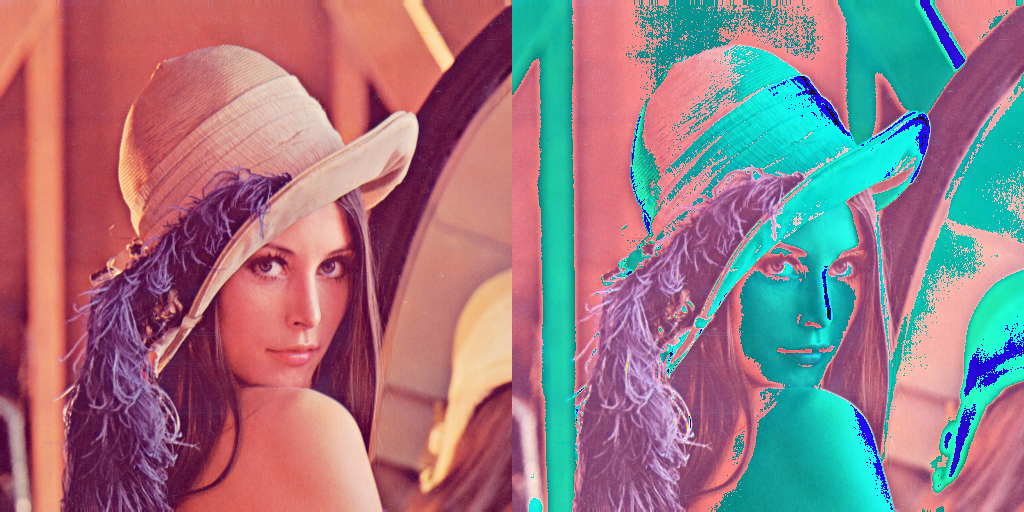

In [3]:
print(' Mengubah tingkat kecerahan citra ')
print('--------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/images/Lenna.png')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


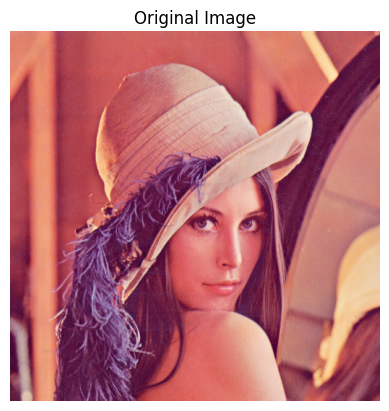

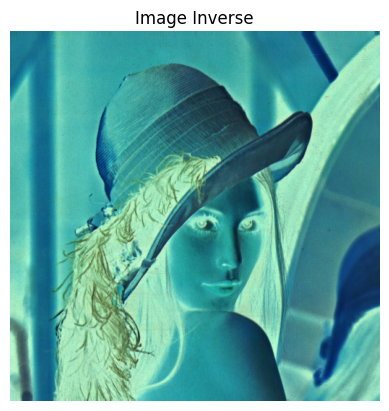

In [4]:
#Tugas
# Load image (ganti path dengan lokasi file di Google Drive/Colab)
img = cv.imread('/content/drive/MyDrive/PCVK/images/Lenna.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()
#1. Implement image inverse in your code using formula shown in the theoretical background subsection above, giving the output shown in the following figure:

inverse = 255 - img
plt.imshow(inverse)
plt.title("Image Inverse")
plt.axis("off")
plt.show()

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]:  1.5


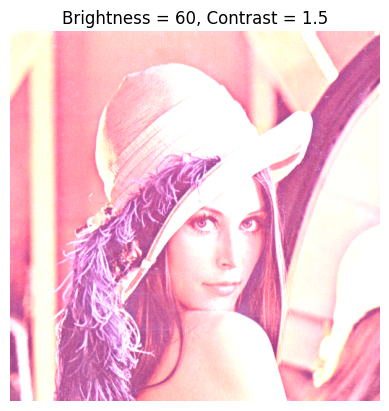

In [5]:
#2. Implement contrast transformation in Google Collaboratory using the formula written in the Theoretical background section, giving the output shown in the following figure:
# Load gambar (ubah path sesuai gambar di Google Drive/Colab)
img = cv.imread('/content/drive/MyDrive/PCVK/images/Lenna.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


# --------------------------------------
# Praktikum 2: Brightness + Contrast
# --------------------------------------
print("Mengubah kontras dan tingkat kecerahan citra")
print("--------------------------------------------")

# Input dari user
brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

# Terapkan transformasi
# Rumus: g(x,y) = contrast * f(x,y) + brightness
adjusted = cv.convertScaleAbs(img, alpha=contrast, beta=brightness)

plt.imshow(adjusted)
plt.title("Brightness = {}, Contrast = {}".format(brightness, contrast))
plt.axis("off")
plt.show()

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 40


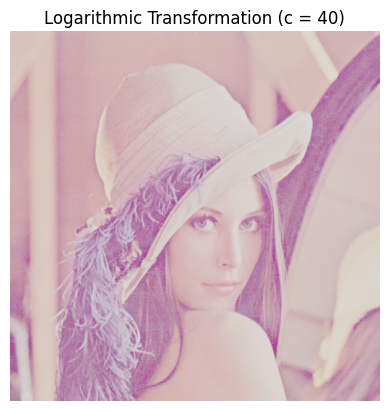

In [6]:
#3. Implement transformation of logarithmic brightness on Google Colaboratory using the formula written in the Theoretical Background Reviews, generating output shown in the following figure:

# Load image (ganti path sesuai lokasi di Google Drive)
img = cv.imread('/content/drive/MyDrive/PCVK/images/Lenna.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# --------------------------------------
# Praktikum 3: Logarithmic Brightness
# --------------------------------------
print("Mengubah tingkat kecerahan citra dengan Transformasi Log")
print("--------------------------------------------------------")

# Input nilai brightness (c)
c = int(input("Masukkan nilai kecerahan: "))

# Transformasi log
log_img = c * (np.log1p(img.astype(np.float32)))
log_img = np.array(np.clip(log_img, 0, 255), dtype=np.uint8)

plt.imshow(log_img)
plt.title("Logarithmic Transformation (c = {})".format(c))
plt.axis("off")
plt.show()


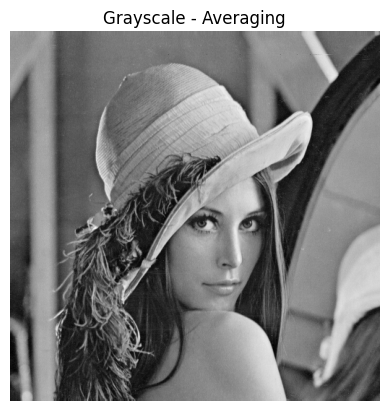

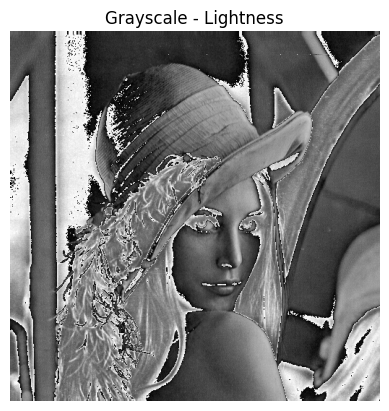

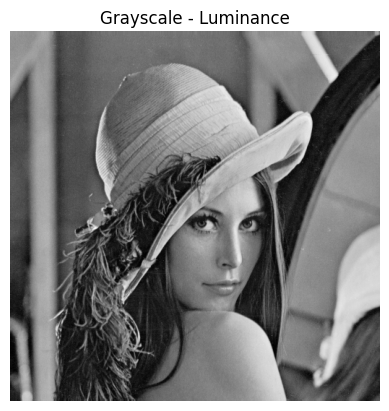

In [7]:
#4. Implement grayscale transformation using the averaging, lightness, and luminance method on Google Colaboratory using the formula written in the Theoretical Background Reviews, generating output as follows :

#a. Averaging
gray_avg = np.mean(img, axis=2).astype(np.uint8)
plt.imshow(gray_avg, cmap='gray')
plt.title("Grayscale - Averaging")
plt.axis("off")
plt.show()

#b. Lightness
gray_lightness = (np.max(img, axis=2) + np.min(img, axis=2)) / 2
gray_lightness = gray_lightness.astype(np.uint8)
plt.imshow(gray_lightness, cmap='gray')
plt.title("Grayscale - Lightness")
plt.axis("off")
plt.show()

#c Luminace
gray_luminance = (0.21 * img[:,:,0] + 0.72 * img[:,:,1] + 0.07 * img[:,:,2]).astype(np.uint8)
plt.imshow(gray_luminance, cmap='gray')
plt.title("Grayscale - Luminance")
plt.axis("off")
plt.show()


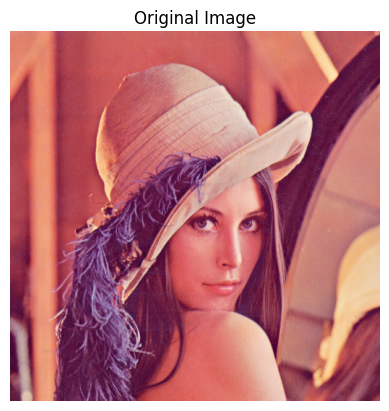

Menampilkan warna kuning, lainnya grayscale


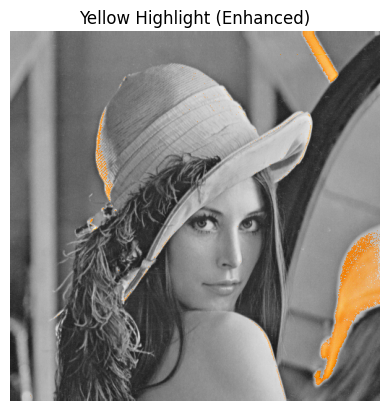

In [8]:
#5. Show certain colors in the image , and change other colors to grayscale. For example , show the blue color in the image input and change the parts other which is not colored blue into grayscale as in the example below :

# Load image
img = cv.imread('/content/drive/MyDrive/PCVK/images/Lenna.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

print("Menampilkan warna kuning, lainnya grayscale")

# Konversi ke grayscale
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)

# Konversi ke HSV
hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

# Rentang warna kuning (diperluas)
lower_yellow = np.array([15, 50, 50])   # batas bawah
upper_yellow = np.array([45, 255, 255]) # batas atas

# Masking warna kuning
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

# Ambil bagian kuning
yellow_part = cv.bitwise_and(img, img, mask=mask)

# Pertegas kuning dengan menaikkan saturasi
hsv_yellow = cv.cvtColor(yellow_part, cv.COLOR_RGB2HSV)
hsv_yellow[:,:,1] = np.clip(hsv_yellow[:,:,1] * 2.0, 0, 255)  # saturasi lebih pekat
yellow_strong = cv.cvtColor(hsv_yellow, cv.COLOR_HSV2RGB)

# Gabungkan kuning dengan grayscale
result = np.where(mask[:,:,None].astype(bool), yellow_strong, gray_bgr)

plt.imshow(result)
plt.title("Yellow Highlight (Enhanced)")
plt.axis("off")
plt.show()
